In [1]:
import requests

def get_kanji(id):
    url = f"https://api.robanohashi.org/kanji/{id}"
    response = requests.get(url)
    return response.json()

In [2]:
get_kanji(500)['meanings']

[{'meaning': 'Inside', 'primary': True},
 {'meaning': 'Within', 'primary': False}]

In [12]:
from PIL import Image, ImageDraw, ImageFont

font = ImageFont.truetype("NotoSansJP-Regular.ttf", 200)
outpath = "kanjis"

def kanji_to_image(kanji, output_file, padding=5, final_size=(64, 64)):
    size = font.getsize(kanji)
    temp_image = Image.new('L', size, color=0)
    draw = ImageDraw.Draw(temp_image)
    draw.text((0, 0), kanji, font=font, fill=255)

    # Calculate the bounding box of the text
    bbox = temp_image.getbbox()

    # Add padding to the bounding box
    padded_bbox = (
        max(0, bbox[0] - padding),
        max(0, bbox[1] - padding),
        min(size[0], bbox[2] + padding),
        min(size[1], bbox[3] + padding)
    )

    # Crop the image to the padded bounding box
    cropped_image = temp_image.crop(padded_bbox)

    # Create a quadratic grayscale image with a white background
    size = max(cropped_image.size)
    quadratic_image = Image.new('L', (size, size), color=0)

    # Paste the cropped image onto the quadratic image
    paste_position = (
        (size - cropped_image.size[0] + 1) // 2,
        (size - cropped_image.size[1] + 1) // 2
    )
    quadratic_image.paste(cropped_image, paste_position)

    # Resize the quadratic image to the final size
    final_image = quadratic_image.resize(final_size, Image.ANTIALIAS)

    final_image.save(output_file)


In [11]:
kanji_to_image("一", "test.png")

In [13]:
!rm -rf kanjis

import os

if not os.path.exists(outpath):
    os.mkdir(outpath)

In [14]:
from tqdm import tqdm
metadata = []

for i in tqdm(range(440, 2467)):
    kanji = get_kanji(i)
    kanji_to_image(kanji['characters'], f"{outpath}/{kanji['characters']}.png")
    radicals = []
    for radical in kanji['component_subjects']:
        radicals.append({
            'characters': radical['characters'],
            'slug': radical['slug'],
            'id': radical['id']
        })
    meta = {
        'id': kanji['id'],
        'characters': kanji['characters'],
        'meanings': ','.join([m['meaning'] for m in kanji['meanings']]),
        'radicals': radicals,
    }
    metadata.append(meta)


100%|██████████| 2027/2027 [12:33<00:00,  2.69it/s]


In [15]:
# compress tar images
import tarfile
with tarfile.open('kanjis.tar.gz', 'w:gz') as tar:
    tar.add(outpath, arcname=os.path.basename(outpath))

In [16]:
from datasets import Dataset
import pandas as pd

df = pd.DataFrame(metadata)
meta_ds = Dataset.from_pandas(df)
meta_ds.to_json('kanji_metadata.jsonl', orient='records', lines=True)


Creating json from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

367801

In [18]:
from datasets import load_dataset

ds = load_dataset('martingrzzler/kanjis2radicals')

Generating train split: 0 examples [00:00, ? examples/s]

Dataset kanjis2radicals downloaded and prepared to /root/.cache/huggingface/datasets/martingrzzler___kanjis2radicals/default/0.0.0/275e8ee81763b2d0e8161bc5b3b4cc22fbb2cf69c7a4e80e08a840a278b81552. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

{'kanji_image': <PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x7F6C540595E0>, 'meta': {'id': 617, 'characters': '死', 'meanings': 'Death', 'radicals': {'characters': ['歹', '匕'], 'id': [132, 57], 'slug': ['yakuza', 'spoon']}}}


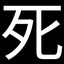

In [21]:
idx = 1000
print(ds['train'][idx])
ds['train'][idx]['kanji_image']

In [141]:
import requests

def get_radical(id):
    url = f"https://api.robanohashi.org/radical/{id}"
    response = requests.get(url)
    return response.json()

In [142]:
radical = get_radical(100)

In [168]:
!ls

 Kosugi-Regular.ttf	   radicals_metadata.jsonl
 nohup.out		   radicals.tar.gz
'Noto Sans JP 400.otf'	   sample_data
 NotoSerifJP-Regular.otf   SawarabiGothic-Regular.ttf
 radicals		   ZenKakuGothicNew-Regular.ttf


In [169]:
import random
import os
from PIL import Image, ImageDraw, ImageFont

font = ImageFont.truetype("ZenKakuGothicNew-Regular.ttf", 200)
outpath = "radicals"

In [200]:
!rm -rf radicals

In [201]:
if not os.path.exists(outpath):
    os.mkdir(outpath)

In [172]:
import random
from PIL import Image, ImageDraw
from io import BytesIO
import cairosvg

final_size = 100

def svg_to_image(temp_image, output_file, padding=5):
    bbox = temp_image.getbbox()

    padded_bbox = (
        max(0, bbox[0] - padding),
        max(0, bbox[1] - padding),
        min(temp_image.width, bbox[2] + padding),
        min(temp_image.height, bbox[3] + padding)
    )

    # Crop the image to the padded bounding box
    cropped_image = temp_image.crop(padded_bbox)

    randomSize = random.randint(30, final_size - 30)
    cropped_image = cropped_image.resize((randomSize, randomSize), Image.LANCZOS)

    quadratic_image = Image.new('RGBA', (final_size, final_size), color=(0, 0, 0, 0))

    paste_position = (
        random.randint(0, final_size - randomSize),
        random.randint(0, final_size - randomSize)
    )

    quadratic_image.paste(cropped_image, paste_position, cropped_image)

    # Convert the image to grayscale
    grayscale_image = quadratic_image.convert('L')
    grayscale_image.save(output_file)


In [153]:
final_size = 100
def radical_to_image(radical, output_file, padding=5):
    size = font.getsize(radical)
    temp_image = Image.new('L', size, color=0)
    draw = ImageDraw.Draw(temp_image)
    draw.text((0, 0), radical, font=font, fill=255)

    # Calculate the bounding box of the text
    bbox = temp_image.getbbox()

    padded_bbox = (
        max(0, bbox[0] - padding),
        max(0, bbox[1] - padding),
        min(size[0], bbox[2] + padding),
        min(size[1], bbox[3] + padding)
    )

    # Crop the image to the padded bounding box
    cropped_image = temp_image.crop(padded_bbox)


    randomSize = random.randint(30,final_size-30)
    cropped_image = cropped_image.resize((randomSize, randomSize), Image.ANTIALIAS)

    quadratic_image = Image.new('L', (final_size, final_size), color=0)

    paste_position = (
        random.randint(0, final_size - randomSize),
        random.randint(0, final_size - randomSize)
    )

    quadratic_image.paste(cropped_image, paste_position)
    quadratic_image.save(output_file)

In [202]:
from tqdm import tqdm

meta_data = []

for i in tqdm(range(1, 440)):
    radical = get_radical(i)
    meta = {
        'id': radical['id'],
        'characters': radical['characters'],
        'slug': radical['slug']
    }
    with BytesIO() as buffer:
        try:
            cairosvg.svg2png(bytestring=radical['character_image'], write_to=buffer)
            buffer.seek(0)
            temp_image = Image.open(buffer).convert('RGBA')

            for j in range(50):
                svg_to_image(temp_image.copy(), f"{outpath}/{i}_{radical['characters']}_{radical['slug']}_{j + 1}.png")
                meta_data.append(meta)
        except:
            print(f"Error with {radical['characters']}")
            print(radical['character_image'])

 85%|████████▌ | 375/439 [09:56<01:17,  1.20s/it]

Error with 六



100%|██████████| 439/439 [11:38<00:00,  1.59s/it]


In [203]:
radical = get_radical(375)

In [204]:
meta = {
        'id': radical['id'],
        'characters': radical['characters'],
        'slug': radical['slug']
    }
try:
        for j in range(50):
                radical_to_image(radical['characters'], f"{outpath}/{375}_{radical['characters']}_{radical['slug']}_{j + 1}.png")

                meta_data.append(meta)
except:
        print(f"Error with {radical['characters']}")
        print(radical['character_image'])

In [210]:
print(meta_data[-1])

{'id': 375, 'characters': '六', 'slug': 'six-375'}


In [205]:
!rm radicals.tar.gz radicals_metadata.jsonl

In [206]:
# compress tar images
import tarfile
with tarfile.open('radicals.tar.gz', 'w:gz') as tar:
    tar.add(outpath, arcname=os.path.basename(outpath))

In [211]:
from datasets import Dataset
import pandas as pd

df = pd.DataFrame(meta_data)
meta_ds = Dataset.from_pandas(df)
meta_ds.to_json('radicals_metadata.jsonl', orient='records', lines=True)

Creating json from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

1065850

In [222]:
from datasets import load_dataset

ds = load_dataset('martingrzzler/radicals')

Generating train split: 0 examples [00:00, ? examples/s]

Dataset radicals downloaded and prepared to /root/.cache/huggingface/datasets/martingrzzler___radicals/default/0.0.0/d06fa45bbf364a018a5727e22360769bec2306739b86877c63d2734b6fad32e7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [228]:
ds['train'][9000]

{'radical_image': <PIL.PngImagePlugin.PngImageFile image mode=L size=100x100 at 0x7FA56A4D92E0>,
 'meta': {'id': 263, 'characters': '成', 'slug': 'become'}}

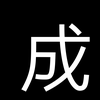

In [227]:
ds['train'][9000]['radical_image']